# Анализ зависимостей между двумя кол-ми переменными
Для выявления данной зависимисти будем использовать отдельный набор данных **housing_sample.csv**

Колонки набора данных:
- price - ежемесячная арендная плата в USD
- type - тип объкта
    - apartment
    - house
    - condo
    - etc.
- sqfeet - площадь объекта
- lat - долгота
- long - широта

Один из лучших способов визуализации зависимостей между двумя кол-ми переменными это сипользование **scatter plot** точечный график

In [4]:
# Загрузим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# загрузим набор данных из файла
housing = pd.read_csv('housing_sample.csv')

# посмотрим первые несколько строк набора данных
print(housing.head())

   price       type  sqfeet  beds  baths      lat      long
0    615  apartment     364     0    1.0  35.1653 -101.8840
1   1346  apartment     816     1    1.0  32.9865  -96.6860
2    900  apartment     500     1    1.0  30.2355  -97.7292
3    650  apartment     700     1    1.0  26.1923  -98.2657
4   1330  apartment    1040     2    2.0  30.6380  -96.2940


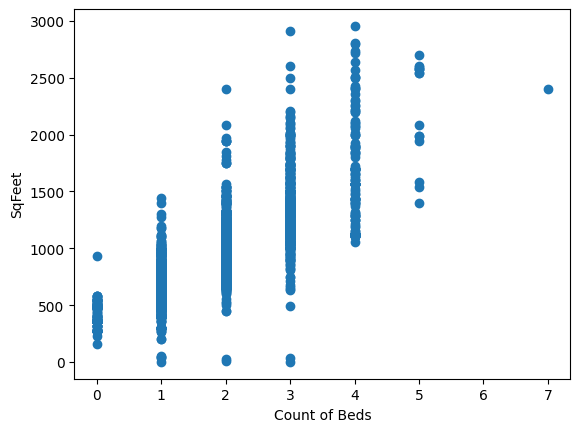

In [5]:
# Для построения точечного графика используется специальный метод библиотеки matplotlib.pyplot
# Который называется scatter
# На вход данный метод принмиаемт два значения
# значения по оси X и значения по оси Y
# значениями осей являются массивы

plt.scatter(x=housing.beds, y=housing.sqfeet)
# Обязательными методами при данном графике являются наименования осей
plt.xlabel('Count of Beds')
plt.ylabel('SqFeet')
plt.show()
plt.close()

## Анализ точечного графика
Судя по полученному графику можно сказать что чем больше площадь объекта тем больше спальных мест в нем размещают

Между двумя переменными опеределенно прослеживается зависимость

## Параметры показывающие силу зависимости
Для выявления силы и направления зависимости рассчитывают два показателя
- Ковариацию (Covariance) - показатель описывающий силу линейной зависимости между двумя числовыми переменными
    - Данный параметр может иметь значение от + бесконечности до - бесконечности
    - Высокий показатель говорит нам о том что чем выше значение одного параметра тем выше значение другого
    - Низкий показатель информирует об обратной зависимости чем ниже один показатель тем выше другой и наоборот
    - Если показатель равен 0 или к нему приближен значит зависимости нет
- Корреляцию (Correlation) - корреляция тоже самое что и ковариация только в сжатом виде (scaled covariance)
    - Значение параметра варьируется от -1 до +1 что делает его более читабельным
    - Остальные параметры такие же как и у ковариации

При визуализации высокая сила зависимости выглядит как прямая линия на точечном графике

Далее расмотрим расчет данных показателей с помощью библиотек и их методов

### Расчет ковариации

In [ ]:
# Для расчета показателя ковариативности используется метод cov() библиотеки numpy
# Данный метод принимает на вход два параметра, а именно два массива с числовыми данными
# зависимости которых требуется выявить
# добавим еще один параметр отображения точности для увеличения читабельности полученных данных
np.set_printoptions(suppress=True, precision = 1)

cov_mat_price_sqfeet = np.cov(housing.price, housing.sqfeet)
print(cov_mat_price_sqfeet)

# Значение ковариации появляется в результате дважды
# Таким образом его значение в данном случае равно 65426.51623487

[[150471.6  65426.5]
 [ 65426.5 110669. ]]


In [ ]:
# Рассмотрим еще один пример
cov_mat_sqfeet_beds = np.cov(housing.sqfeet, housing.beds)
print(cov_mat_sqfeet_beds)

# Значение ковариации равно 228.2

[[110669.     228.2]
 [   228.2      0.7]]


### Расчет корреляции

In [ ]:
# Для расчета корреляции используется метод pearsonr кторый также принимает на вход два массива с числовыми данными зависимость которых требуется выявить
# Данный метод находится в библиотеке scipy.stats
from scipy.stats import pearsonr

corr_sqfeet_beds, p = pearsonr(housing.sqfeet, housing.beds)
# Результатом данного метода является кортеж значений
# первым в кортеже является само значение корреляции
# вторый передвается значение pvalue
print(corr_sqfeet_beds)

0.8060022524416222


#### Анализ значения корреляции
Наличие линейной зависимости считают с момента если значение корреляции больше 0.3

Если значение корреляции превышает 0.6 то зависимость считают сильной линейной зависимость

### Важно помнить
Важно всегда помнить что два данных показателя расчитывают именно линейную зависимость в случае если зависимость не линейная

То данные показатели могут ввести в заблуждение.

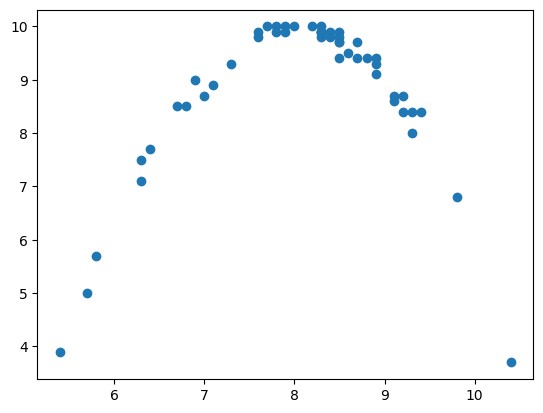

In [ ]:
# Рассмотрим это на примере другого набора данных sleep_performance.csv
# Загрузим данные в переменную sleep

sleep = pd.read_csv('sleep_performance.csv')

# нарисуем точечный график для выявления зависимости
plt.scatter(x=sleep.hours_sleep, y=sleep.performance)
plt.show()
plt.close()
# Как видно прослеживается явная зависимость но она не линейная

In [ ]:
# Давайте рассчитаем значения ковариации и корреляции
cov_sleep_perf = np.cov(sleep.hours_sleep, sleep.performance)
print(cov_sleep_perf)

corr_sleep_perf, p_sleep = pearsonr(sleep.hours_sleep, sleep.performance)
print(corr_sleep_perf)

# Из полученных значений можно сделать вывод что кореляции нет совсем так как корреляция и ковариация приближены к 0
# Хотя на графике существенно другая картина

[[1.2 0.5]
 [0.5 2.3]]
0.28149781890494124
